In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.centrality as centrality

In [ ]:
nx.draw(G, with_labels=True)

In [ ]:
nx.clustering(G)

In [ ]:
x = nx.algorithms.shortest_paths.generic.shortest_path_length(G)

In [ ]:
list(x)

In [ ]:
def loop(episode):
    with open(f'data/starwars-episode-{episode}-interactions-allCharacters.json') as f:
        data = json.load(f)
    nodes = [ node['name'] for node in data["nodes"] ]
    edges = [ (nodes[link['source']], nodes[link['target']]) for link in data["links"] ]
    G = nx.Graph()
    for node in nodes:
        G.add_node(node)
    for edge in edges:
        G.add_edge(edge[0],edge[1])
    plt.figure(figsize=(30,15))
    plt.subplot(121)
    nx.draw(G, with_labels=True)
    return sorted(centrality.betweenness_centrality(G).items(), key = lambda x: x[1])[::-1]

In [ ]:
betweenness = []
for i in range(1,8):
    betweenness.append(loop(i))

In [ ]:
for characters in betweenness:
    print(characters[:5])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from numpy import *
def f(t):
    return t**2*exp(-t**2)

t = linspace(1, 3, 100)    # 51 points between 0 and 3
y = ones(len(t))         # allocate y with float elements
for i in range(len(t)):
    y[i] = f(t[i])

plt.plot(t, y, label = "Jar-Jar")

mu = 0
variance = 1
sigma = math.sqrt(variance)
q = np.linspace(mu + sigma, mu + 4*sigma, 100) #obi wan
plt.plot(q, stats.norm.pdf(x, mu, sigma), label ="Obi-Wan")
w = np.linspace(mu + 3*sigma, mu + 6.5*sigma, 100) #darth vader
plt.plot(w, stats.norm.pdf(x, mu, sigma), label = "Darth Vader")
a = np.linspace(mu + 3*sigma, mu + 7.7*sigma, 100) #luke
plt.plot(a, stats.norm.pdf(x, mu, sigma), label = "Luke Skywalker")
plt.xlabel("Episodes")
plt.ylabel("Character importance")
plt.xticks([1,2,3,4,5,6,7])
plt.legend(loc="upper right")
plt.show()

In [7]:
import random

def get_randomness(G, k, p):
    n = len(list(G))
    spread = []
    spread_paths = []
    for j in range(1, k):  # outer loop is neighbors
        spread.append(G)
        spread_paths.append(nx.average_shortest_path_length(G))
        if random.randint(0, 100) < p*100:
            u, v = random.choice(list(set(G.edges) - set(nx.bridges(G))))
            G.remove_edge(u, v)
            w = random.choice(list(set(G) - set(x for _,x in list(G.edges(u))))) 
            G.add_edge(u, w)
    return spread, spread_paths

In [8]:
set(G)

{1, 2, 3, 4, 5, 6, 7}

In [9]:
G = nx.Graph()
nodes = [1,2,3,4,5,6,7]
edges = [(1,2), (1,3),(2,3),(3,4),(3,5),(4,5),(2,4),(2,5),(5,6),(6,7)]
for node in nodes:
    G.add_node(node)
for edge in edges:
    G.add_edge(edge[0],edge[1])

In [10]:
x= get_randomness(G,14,0.6)

In [11]:
x

([<networkx.classes.graph.Graph at 0x7fb7483e4460>,
 [1.8095238095238095,
  1.8095238095238095,
  1.7619047619047619,
  1.9047619047619047,
  1.6666666666666667,
  1.6666666666666667,
  1.6666666666666667,
  1.619047619047619,
  1.6666666666666667,
  1.6666666666666667,
  1.6666666666666667,
  1.8095238095238095,
  1.8095238095238095])

In [ ]:
nx.draw(x[0][-1], with_labels=True)

In [ ]:
nx.draw(G, with_labels=True)

In [ ]:
list(G)

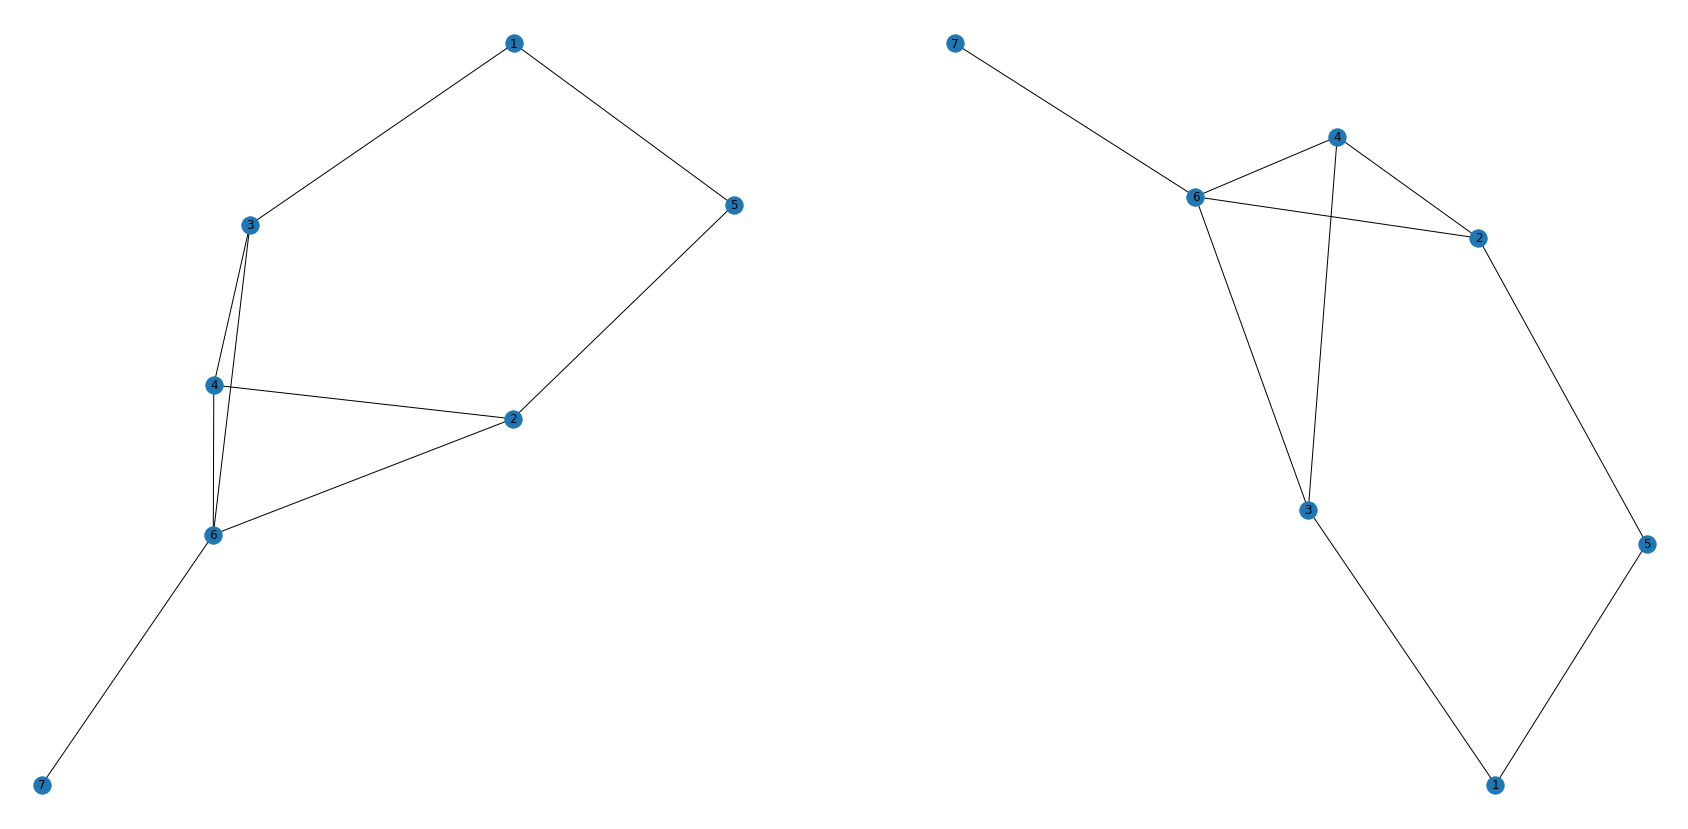

In [33]:
plt.figure(figsize=(30,15))
plt.subplot(121)
nx.draw(G, with_labels=True)
plt.savefig('Graphs.png')
